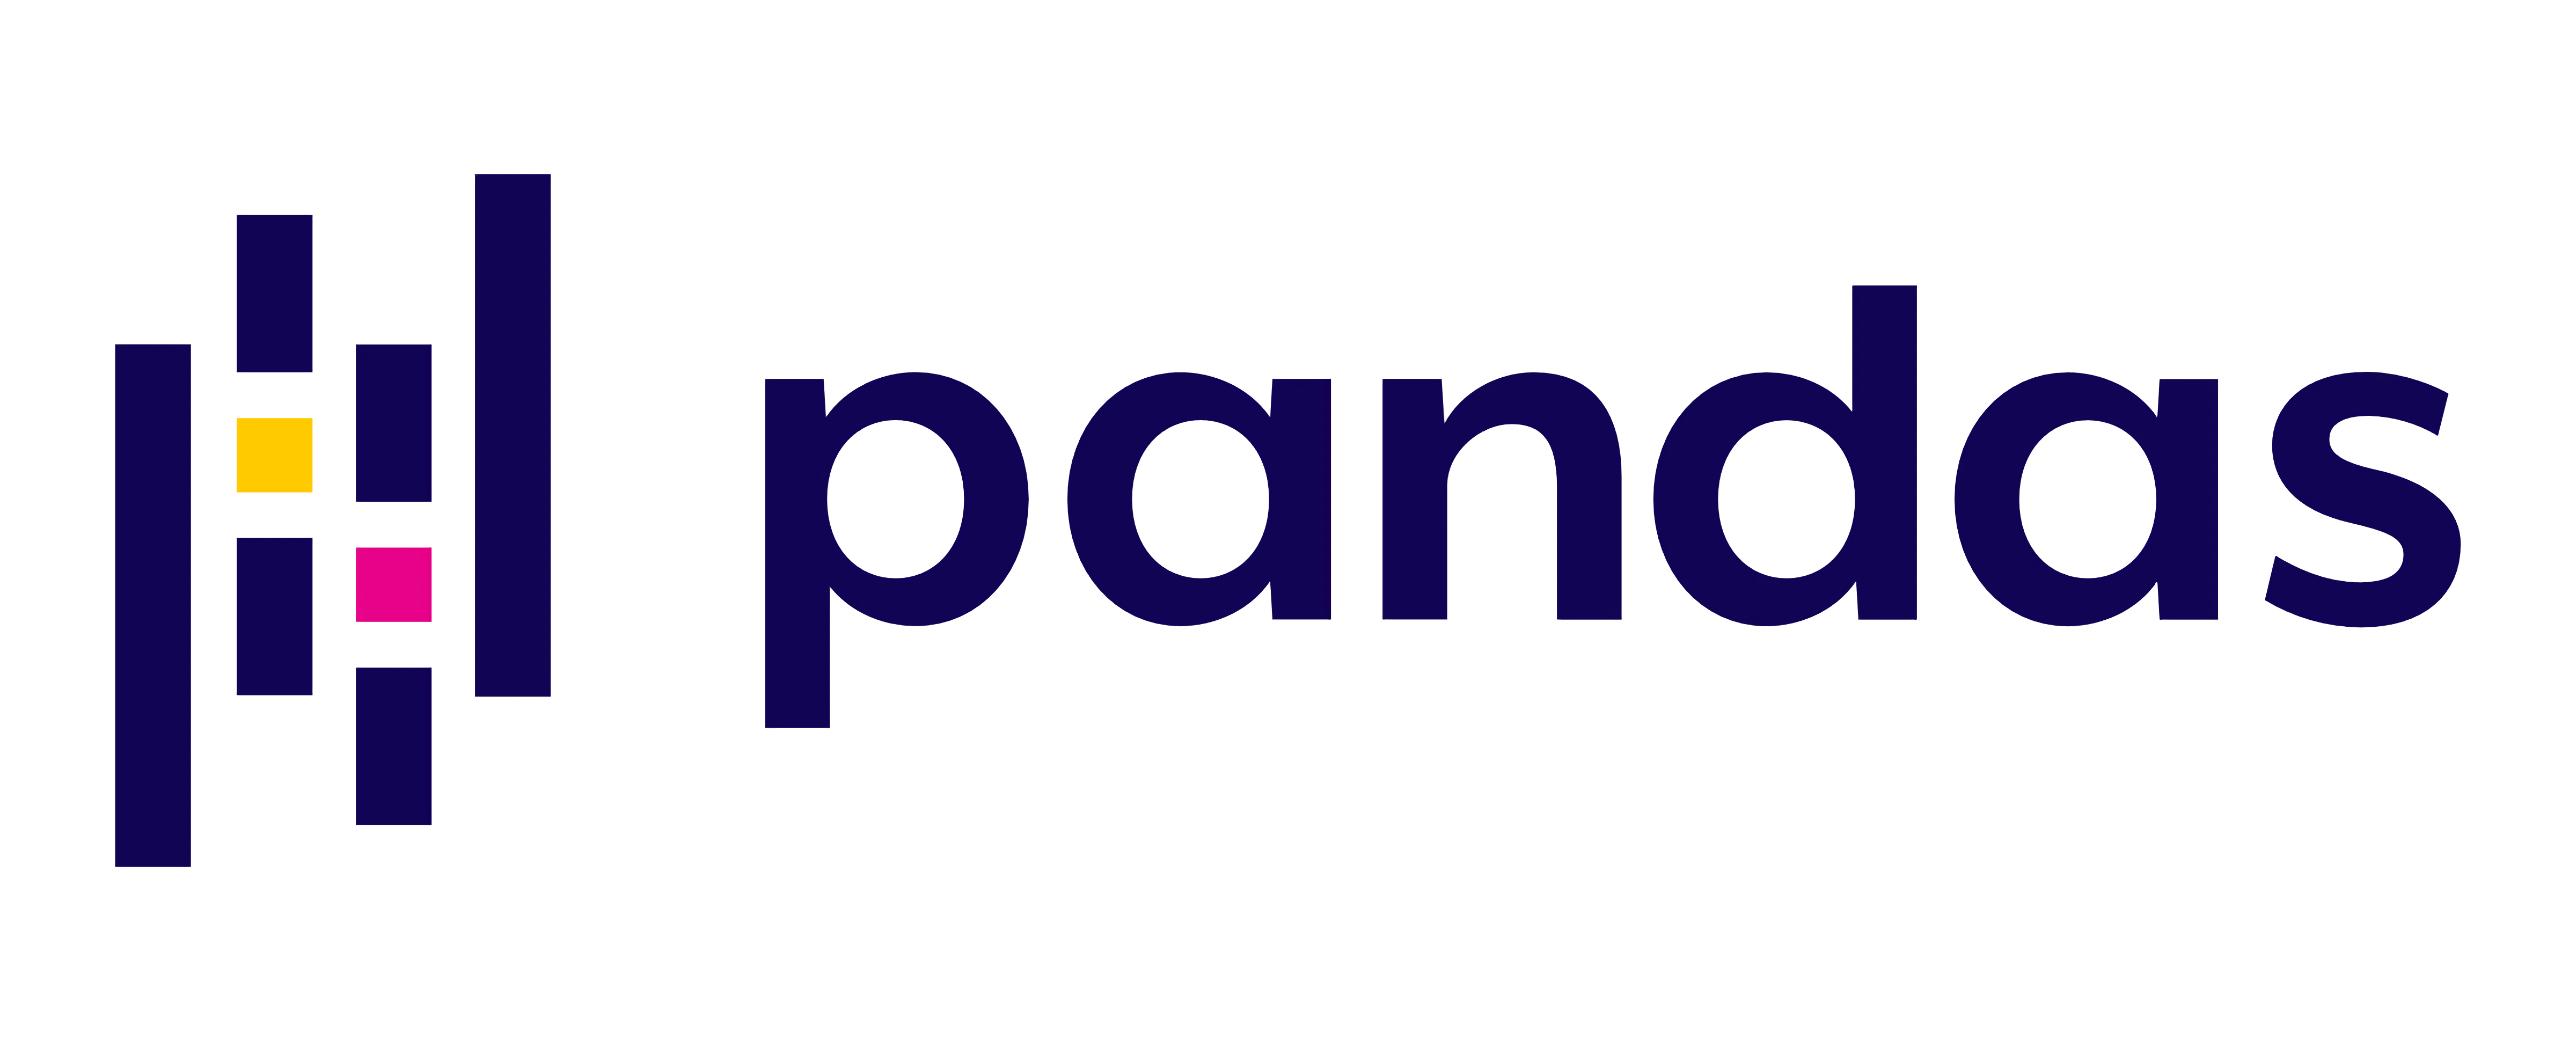

# Title: Pandas 12

#### 
### #45 Memadukan loc dan iloc untuk Seleksi Data pada Data Frame
#### Source : https://youtu.be/_DPDuwz19-U

#### Import Modules

In [1]:
import pandas as pd

# Cek versi
print(pd.__version__)

1.2.4


#### Persiapan Data Frame

In [2]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


#### Memadukan `loc` dan `iloc` untuk Melakukan Seleksi Data

- Sisi sebelah kiri merepresentasikan baris sedangkan sisi sebelah kanan merepresentasikan kolom.
- Fungsi `iloc` berguna untuk menyeleksi baris, sedangkan fungsi `loc` digunakan untuk menyeleksi kolom.
- Catatan: urutan penempatan fungsi `loc` dan `iloc` tidak mempengaruhi hasil.

In [3]:
df.iloc[15:20, :].loc[:, 'name':'age']

,name,sex,age
15,"Baumann, Mr. John D",male,NaN
16,"Baxter, Mr. Quigg Edmond",male,24.0
17,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0
18,"Bazzani, Miss. Albina",female,32.0
19,"Beattie, Mr. Thomson",male,36.0


In [4]:
df.loc[:, 'name':'age'].iloc[15:20, :]

,name,sex,age
15,"Baumann, Mr. John D",male,NaN
16,"Baxter, Mr. Quigg Edmond",male,24.0
17,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0
18,"Bazzani, Miss. Albina",female,32.0
19,"Beattie, Mr. Thomson",male,36.0


#### 
### #46 Seleksi Weekdays dan Weekends pada Data Deret Waktu
#### Source : https://youtu.be/7I9DlFkyzVQ

#### Import Modules

In [5]:
import pandas as pd
import numpy as np

# Cek versi
print(pd.__version__)
print(np.__version__)

1.2.4
1.20.1


#### Persiapan Data Frame

- Membuat sebuah data frame  yang terdiri dari 2 kolom dan 365 baris yang memiliki nilai angka acak 1-20.

In [6]:
n_rows = 365
n_cols = 2
cols = ['col1', 'col2']

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)

df.index = pd.util.testing.makeDateIndex(n_rows, freq='D')
df

C:\Users\alber\anaconda3\lib\site-packages\pandas\util\__init__.py:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


,col1,col2
2000-01-01,14,5
2000-01-02,3,6
2000-01-03,6,2
2000-01-04,13,6
2000-01-05,14,15
...,...,...
2000-12-26,6,5
2000-12-27,16,9
2000-12-28,13,15
2000-12-29,15,9


#### Seleksi Weekdays dan Weekends

- Parameter dayofweek mengindikasi hari pada suatu minggu tertentu.
- 5 index pertama mengindikasikan weekdays (0 - 4), sedangkan 2 index terakhir mengindikasikan weekend (5 - 6).
- Lanjut: 0 adalah senin dan 6 adalah minggu.

In [7]:
weekdays_df = df[df.index.dayofweek.isin([0, 1, 2, 3, 4])]
weekdays_df.head(7)

,col1,col2
2000-01-03,6,2
2000-01-04,13,6
2000-01-05,14,15
2000-01-06,3,11
2000-01-07,17,18
2000-01-10,13,16
2000-01-11,7,15


In [8]:
weekends_df = df[df.index.dayofweek.isin([5, 6])]
weekends_df.head(7)

,col1,col2
2000-01-01,14,5
2000-01-02,3,6
2000-01-08,19,10
2000-01-09,11,5
2000-01-15,11,15
2000-01-16,9,6
2000-01-22,12,19
